In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set() # seaborn 속성을 기본값으로 설정

파일에서 데이터를 읽어들임

In [3]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

#from enum import Enum
class Columns:
    # 원래 존재하는 항목
    PassengerId = "PassengerId"
    Survived = "Survived"
    Pclass = "Pclass"
    Name = "Name"
    Sex = "Sex"
    Age = "Age"
    SibSp = "SibSp"
    Parch = "Parch"
    Ticket = "Ticket"
    Fare = "Fare"
    Cabin = "Cabin"
    Embarked = "Embarked"
    # 새로 생성하는 항목
    Title = "Title"
    FareBand = "FareBand"

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test의 경우 예측에서 제출해야 하는 데이터이기에 Survived 항목이 없다.

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별 (male/female)<br>
- **Age** : 승객 나이(float) <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Parch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버(문자열)<br>
- **Fare** 티켓의 요금(float)<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>



데이터가 존재하지 않는 feature들을 확인해 본다.

### 데이터 속성 확인

Pclass 에 따른 생존률

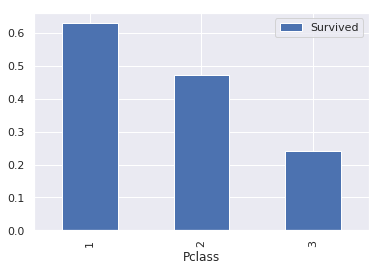

In [10]:
train[[Columns.Pclass, Columns.Survived]].groupby([Columns.Pclass]).mean().plot.bar()

성별에 따른 생존률

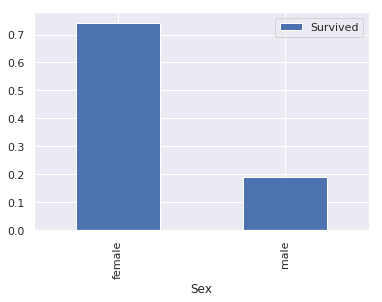

In [15]:
train[[Columns.Sex, Columns.Survived]].groupby([Columns.Sex]).mean().plot.bar()

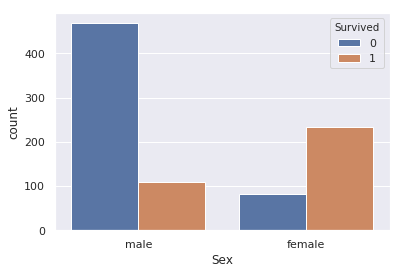

In [53]:
sns.countplot(x=Columns.Sex, hue=Columns.Survived, data=train)

Age에 따른 생존률

일단 Age의 분포는 어떨까?

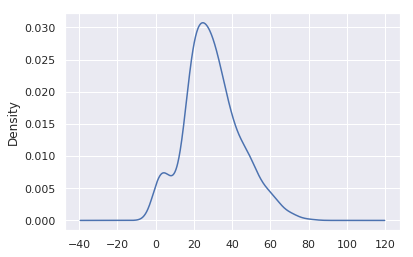

In [54]:
train[Columns.Age].plot.kde()

Age : 0  ~  80
gap: 6
[-1, 0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, inf]


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


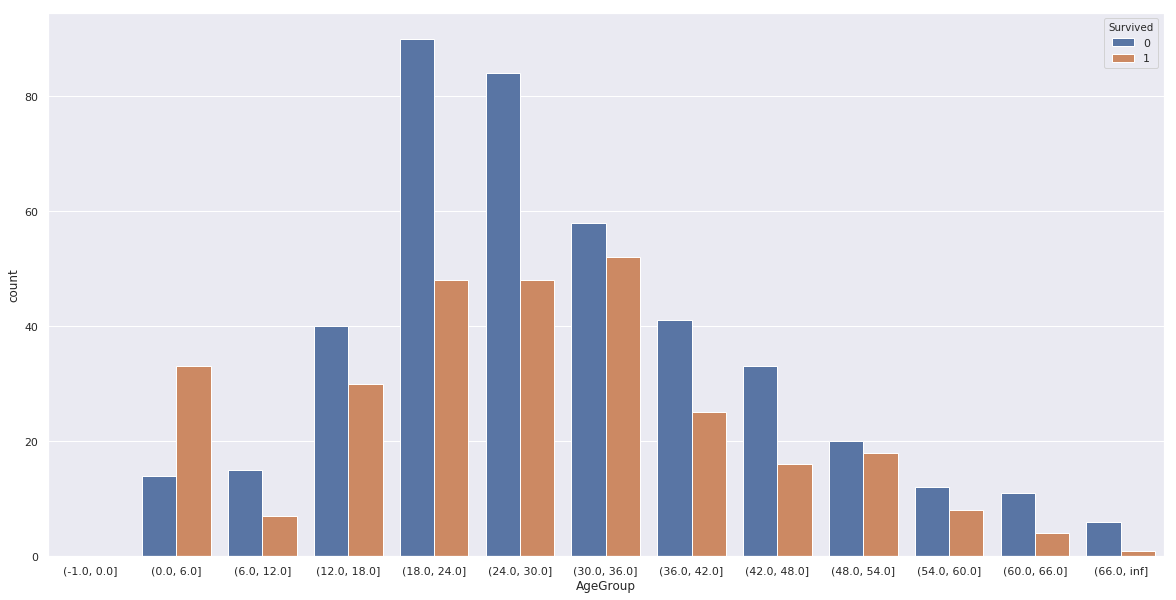

In [56]:
df = train[train[Columns.Age].isnull() == False]
#df.describe()

# 나이대로 나누어서 출력해 본다.
age_min = df[Columns.Age].min().astype('int')
age_max = df[Columns.Age].max().astype('int')
print("Age :", age_min, " ~ ", age_max)
gap = ((age_max - age_min) / 12).astype(int)
print('gap:', gap)

bins = [-1]
for i in range(12):
    bins.append(i * gap)
bins.append(np.inf)
print(bins)

_df = df
_df['AgeGroup'] = pd.cut(_df[Columns.Age], bins)
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot('AgeGroup', hue=Columns.Survived, data=_df, ax=ax)

Pclass/Age에 따른 생존률 변화량

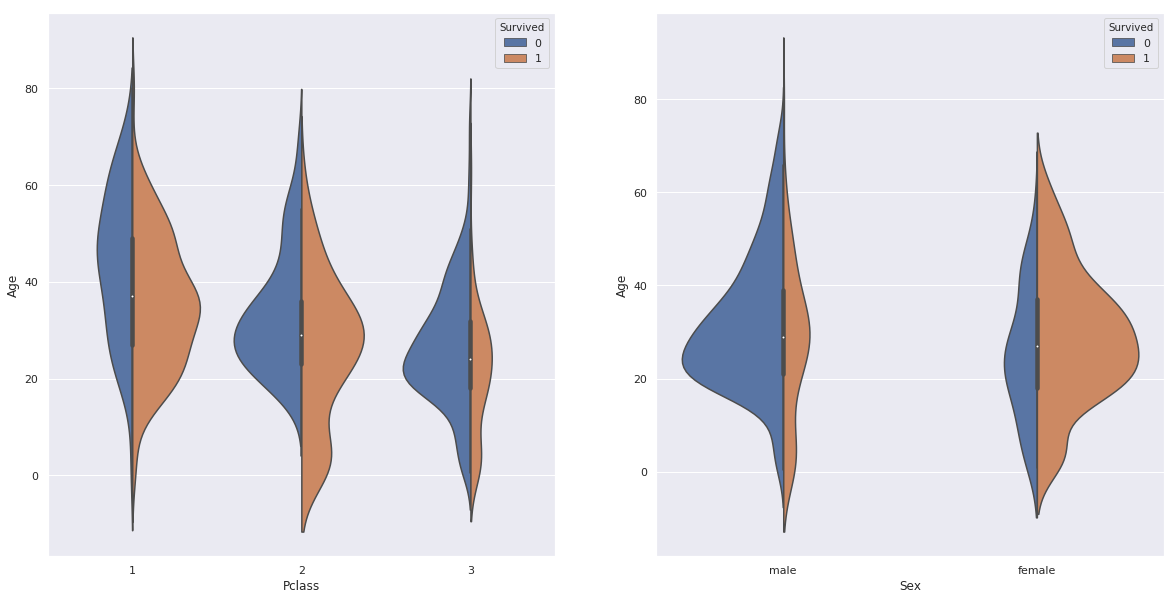

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.violinplot(Columns.Pclass, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[0])
sns.violinplot(Columns.Sex, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[1])

In [45]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

비어있는 데이터(null)을 처리한다.<br>

**Age** : null이 많고 나이가 중요할 것으로 판단되니 데이터를 채워야 할 필요가 있다.<br>
**Cabin** : null이 너무 많다.<br>
**Embarked** : null이 거의 없으므로 중요하지 않은 값으로 채워도 문제가 없어 보임<br>